## Importing necessary libraries and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from keybert import KeyBERT

# Downloading NLTK resources
nltk.download('vader_lexicon')

# Loading the dataset
df = pd.read_csv("sample_reviews.csv")  # We will export it for you below
df.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91626\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review_text,timestamp
0,Fast service and amazing coffee. Highly recomm...,2025-01-14
1,"I had high expectations, but they weren't met.",2024-10-29
2,The product broke after a week. Not happy at all.,2025-04-13
3,Clean place and polite staff. Will come again.,2024-11-29
4,Great customer service. Helped me choose the r...,2024-11-30


## Sentiment Analysis using VADER

#### VADER (Valence Aware Dictionary and Sentiment Reasoner): It is a sentiment analysis tool. Basically, Designed to analyze sentiments expressed in text, It defines them with the labels: POSITIVE, NEGATIVE, NEUTRAL

In [2]:
sid = SentimentIntensityAnalyzer()

df["sentiment_score"] = df["review_text"].apply(lambda x: sid.polarity_scores(x)['compound'])
df["sentiment_label"] = df["sentiment_score"].apply(
    lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral")
)

df[["review_text", "sentiment_score", "sentiment_label"]].head()


,review_text,sentiment_score,sentiment_label
0,Fast service and amazing coffee. Highly recomm...,0.7836,Positive
1,"I had high expectations, but they weren't met.",0.0000,Neutral
2,The product broke after a week. Not happy at all.,-0.7002,Negative
3,Clean place and polite staff. Will come again.,0.4019,Positive
4,Great customer service. Helped me choose the r...,0.6249,Positive


## Theme Extraction using KeyBert

#### KeyBERT is basically used for Keyword extraction, It understands the meaning and context of words within a document to identify the most relevant keywords and keyphrases.

In [3]:
kw_model = KeyBERT()
all_text = " ".join(df["review_text"])
themes = kw_model.extract_keywords(all_text, top_n=10)
themes

[('coffee', 0.4526),
 ('service', 0.3224),
 ('customer', 0.3025),
 ('meal', 0.2981),
 ('visit', 0.2815),
 ('food', 0.2771),
 ('experience', 0.2574),
 ('quality', 0.2553),
 ('friendly', 0.2247),
 ('recommend', 0.2231)]

## Data Visualization: Sentiment Trends

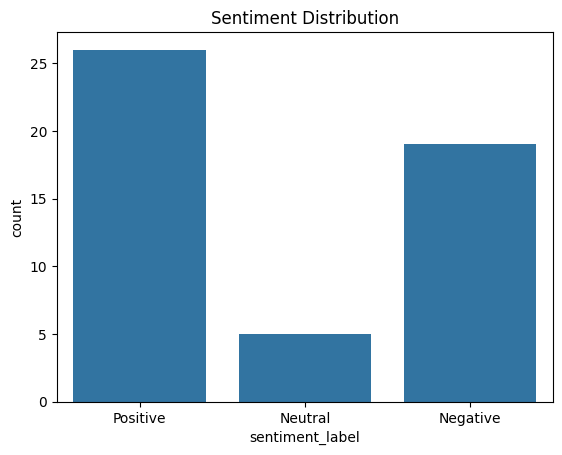

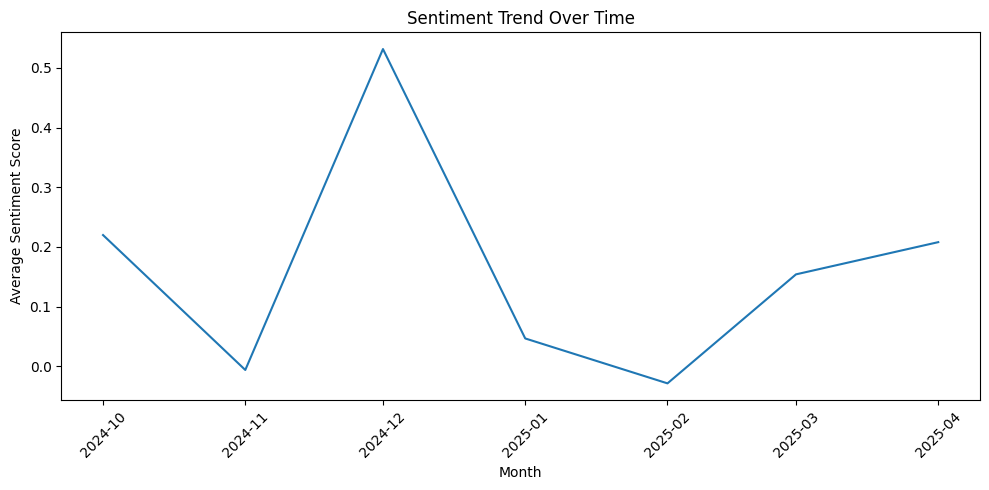

In [4]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df['date'] = df["timestamp"].dt.to_period("M").dt.to_timestamp()

# Plot sentiment trend over time
sns.countplot(data=df, x="sentiment_label", order=["Positive", "Neutral", "Negative"])
plt.title("Sentiment Distribution")

# Sentiment trend over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.groupby("date")["sentiment_score"].mean())
plt.title("Sentiment Trend Over Time")
plt.ylabel("Average Sentiment Score")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
